In [ ]:
from google.colab import files
files.upload()  # Select image.png


Saving image.png to image (2).png


{'image (2).png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb4\x00\x00\x01s\x08\x02\x00\x00\x00\xd9\xbbk\x1d\x00\x00a\xe1IDATx\xda\xed\x9d\x07\x98\x15\xd5\xf9\xffI~\x1a5\x12\x8db4*\x9a\xfc\x13D\x85`/\x18\xc0\x1aAD#6@\xa2h,`\x88\x1a\x15\xd1\x88\xa2"\x12+*J\x13P@\x90"(H\x11\xe9M\x10\xa5\xb7\xa5\xf7\xde{g\x97\xffg\xf7\x85\xe3p\xdb\xde;3w\xe6\xdc\xbb\xef\xf7\x99\x87\xe7\xeepw\xee\xec=s\xbe\xe7-\xdf\xf3\xbe\xc5\x0e)\x14\n\x85"\n\xc5\xf4+P(\x14\n%G\x85B\xa1PrT(\x14\n%G\x85B\xa1PrT(\x14\n%G\x85B\xa1PrT(\x14\n%G\x85B\xa1PrT(\x14\n%G\x85B\xa1PrT(\x14\n%G\x85B\xa1PrT(\x14\n%G\x85B\xa1P(9*\x14\n\x85\x92\xa3B\xa1P(9*\x14\n\x85\x92\xa3B\xa1P(9*\x14\n\x85\x92\xa3B\xa1P(9*\x14\n\x85\x92\xa3B\xa1P(9*\x14\n\x85\x92\xa3B\xa1P(9*\x14\n\x85\x92\xa3B\xa1P(9*\x14\n\x85\x92\xa3B\xa1Px\xc1d\x07V\xadZ\xa5\xe4\xa8P\xe4c\xde\xbcy\xdd\xbauk\xd0\xa0A\xdd\x02\\~\x04\xf2#\xe7\xf9_\xde\xa3_T\xd6`\xfb\xf6\xed\xa3F\x8dz\xed\xb5\xd7n\xbf\xfd\xf6\xcb\xe3#\xd3\x87>\x08r\xdc\xb9s\xe7\xa4I\x93z\xf7\xee\xdd\xaaU\xab

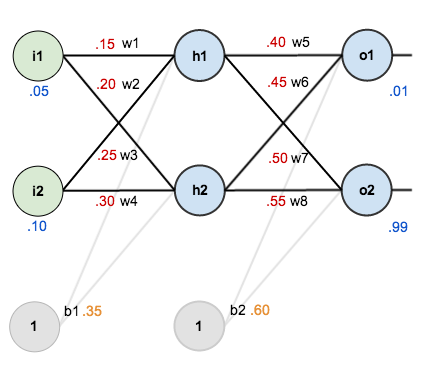

In [ ]:
from IPython.display import Image
Image("image.png")

In [ ]:
##############################################################################
# Implementation of a A Step by Step Backpropagation Example by Matt Mazur
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
##############################################################################

# Original code: https://github.com/vendidad/DS-repo/blob/master/Backpropagation%20-%20Consolidated%20Script.ipynb


import numpy as np
np.set_printoptions(precision=4)

def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(10000)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))

main()

W1 = [[0.3061 0.3517]
 [0.4129 0.4677]] 

 W2 = [[-3.9426 -3.8926]
 [ 2.8963  2.9463]] 

 Output = [[0.0162 0.9839]] 
 Desired output = [[0.01 0.99]] 
 Error = 3.792325126541209e-05
